In [203]:
import numpy as np 
import pandas as pd 
from sklearn.svm import SVC# SVM
from sklearn.model_selection import train_test_split # ホールドアウト法
from sklearn.model_selection import KFold # 交差検証法
from sklearn.metrics import mean_absolute_error # 回帰問題における性能評価
from sklearn.linear_model import LinearRegression #線形回帰
from sklearn.feature_selection import RFECV #ステップワイズ法
from sklearn.linear_model import LogisticRegression #ロジスティック回帰 

In [204]:
%matplotlib inline
import matplotlib.pyplot as plt #プロット
from sklearn.linear_model import SGDClassifier #確率的勾配降下法
from sklearn.metrics import log_loss, accuracy_score, confusion_matrix#, precision_recall_fscore_support
#accuracy_score=精度分類スコア
#confusion_matrix=混同行列

In [205]:
df = pd.read_csv()

# 前処理

In [206]:
#データをランダムに抽出(元データが大きすぎるため)
df=df.sample(frac=0.1,random_state=1234)

In [207]:
#欠損値削除
df= df.dropna(how='any')

In [208]:
df

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
77536,1394440984,Lake Effect,Shorts,Film & Video,USD,2011-11-18,8000.0,2011-10-28 00:24:58,8000.00,successful,29,US,8000.00,8000.00,8000.00
63520,1323037478,Headhunt Revisited Documentary - Art Celebrati...,Documentary,Film & Video,USD,2014-05-06,35000.0,2014-04-06 20:13:07,37420.00,successful,172,US,37420.00,37420.00,35000.00
376632,989665819,Project: U make COLOSSAL Cones,Food,Food,USD,2012-06-16,3000.0,2012-04-18 05:57:55,105.00,failed,2,US,105.00,105.00,3000.00
282839,509176684,"Torches New Album ""The Friction""",Music,Music,USD,2013-04-13,7000.0,2013-02-12 19:56:50,735.00,failed,25,US,735.00,735.00,7000.00
286484,527368001,Thomas Edmund's Debut Album (EP),Music,Music,GBP,2014-01-20,700.0,2013-12-21 20:01:38,0.00,failed,0,GB,0.00,0.00,1155.57
357089,889098539,America's Broadcast Pioneer: WGPR-TV62,Journalism,Journalism,USD,2015-11-28,10000.0,2015-09-29 04:47:19,10156.00,successful,33,US,10156.00,10156.00,10000.00
11624,1058240403,Tucson Hop Shop...Your Craft Beer Destination.,Drinks,Food,USD,2015-07-23,10000.0,2015-07-08 14:39:07,13763.00,successful,82,US,13763.00,13763.00,10000.00
171126,1870446255,Into War - Developed by one Person.,Video Games,Games,USD,2013-07-06,15000.0,2013-06-06 20:12:31,25.00,canceled,1,US,25.00,25.00,15000.00
350151,853812245,Once Upon A Time In The Hindu Kush,Shorts,Film & Video,USD,2014-01-05,76000.0,2013-12-06 02:25:35,30.00,failed,1,US,30.00,30.00,76000.00
276832,478415344,iHomeRegistry - Create Your Perfect Space!,Interactive Design,Design,USD,2016-10-13,50000.0,2016-09-13 19:14:23,0.00,failed,0,US,0.00,0.00,50000.00


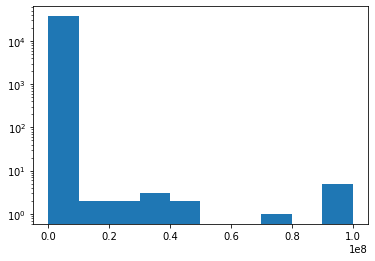

In [209]:
####ヒストグラム###
plt.hist(df['goal'],log=True,)
plt.show() 

In [210]:
#0.7e8=7000000あたりに外れ値がありそうなので、件数と、近辺のグラフと、データを見てみる。

In [211]:
df_tmp = df['goal'][df['goal']>=70000000]
display(df_tmp.shape)
display(df_tmp)

(6,)

369688    100000000.0
72775     100000000.0
279697     80000000.0
278601    100000000.0
213340    100000000.0
281020    100000000.0
Name: goal, dtype: float64

In [212]:
#dfを70000000以下に限定、
#dropがうまくいかない。
df= df [df['goal']<70000000]

In [213]:
#launched、deadlineから開催期間(日数)を計算する
##df['launched'] = pd.to_datetime(df['launched']) 
##df['deadline'] = pd.to_datetime(df['deadline'])
#期間を計算
#df['delta'] = (df['deadline'] - df['launched']).apply(lambda x: x.days)

In [214]:
y_col = 'state'

x_cols = ['category','main_category','currency','country']

#説明変数を、ダミー変数にする
X = pd.get_dummies(df[x_cols])#drop_first=True

#目的変数を successfulのフラグに変更
y = pd.get_dummies(df[y_col])['successful']

In [215]:
#説明変数に'goal','delta'を追加
X = pd.concat([X, df['goal']], axis=1)
#X = pd.concat([X, df['delta']], axis=1)

In [216]:
# 全データのうち、20%をテストデータにする
test_size = 0.2

# データを分割（テストデータはランダム選択）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=1234) 

# ステップワイズ法

In [142]:
# estimatorにモデルをセット
estimator = SGDClassifier(loss="log")

# RFECVは交差検証によってステップワイズ法による特徴選択を行う
# cvにはFold（=グループ）の数，scoringには評価指標を指定する
#今回は回帰なのでneg_mean_absolute_errorを評価指標に指定（分類ならaccuracy）cv=クロスバリデーション
rfecv = RFECV(estimator, cv=10, scoring='accuracy')#再帰的な機能の削除と、最適な数の機能の相互検証された選択による機能のランキング。

In [143]:
#ダミー変数に変換したX,yの要素を取得
X = X_train.values
y = y_train.values

In [144]:
rfecv.fit(X, y)

RFECV(cv=10,
      estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                              early_stopping=False, epsilon=0.1, eta0=0.0,
                              fit_intercept=True, l1_ratio=0.15,
                              learning_rate='optimal', loss='log',
                              max_iter=1000, n_iter_no_change=5, n_jobs=None,
                              penalty='l2', power_t=0.5, random_state=None,
                              shuffle=True, tol=0.001, validation_fraction=0.1,
                              verbose=0, warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
      verbose=0)

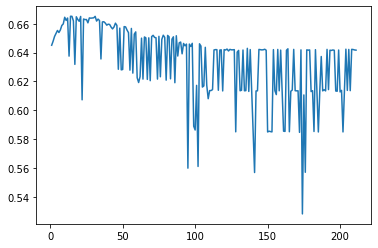

In [147]:
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [148]:
# rfecv.support_でランキング1位以外はFalseとするindexを取得できる
# Trueになっている特徴を使用すれば汎化誤差は最小となる
rfecv.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [149]:
# bool型の配列に ~ をつけるとTrueとFalseを反転させることができる
# ここでTrueになっている特徴が削除してもよい特徴
remove_idx = ~rfecv.support_
remove_idx

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [150]:
# 削除してもよい特徴の名前を取得する
remove_feature = X_train.columns[remove_idx]
remove_feature

Index(['category_3D Printing', 'category_Academic', 'category_Accessories',
       'category_Action', 'category_Animals', 'category_Animation',
       'category_Anthologies', 'category_Apparel', 'category_Apps',
       'category_Architecture',
       ...
       'country_JP', 'country_LU', 'country_MX', 'country_NL', 'country_NO',
       'country_NZ', 'country_SE', 'country_SG', 'country_US', 'goal'],
      dtype='object', length=197)

In [245]:
# drop関数で特徴を削除
selected_X_train= X_train.drop(remove_feature, axis=1)
selected_X_train
selected_X_test= X_test.drop(remove_feature, axis=1)

In [ ]:
# 説明変数が210から201に変化（9個削減された。）

# 決定木

In [152]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
#X_train = df[["x1","x2"]].values
#y_train = df["label"].values
clf = DecisionTreeClassifier(criterion="gini", max_depth=2, min_samples_split=2, min_samples_leaf=2, random_state=1234)
clf = clf.fit(X_train, y_train)
print("訓練誤差score=", clf.score(X_train, y_train))
print("汎化誤差score=", clf.score(X_test, y_test))
#print(clf.predict(X_test)) #予測したい場合,結果が不満

訓練誤差score= 0.641461625658465
汎化誤差score= 0.6480864115215362


In [153]:
# 説明変数の重要度を出力する
# scikit-learnで算出される重要度は、ある説明変数による不純度の減少量合計である。
print(clf.feature_importances_)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


# ランダムフォレスト

In [154]:
from sklearn.ensemble import RandomForestClassifier

#X_train = iris.data
#y_train = iris.target

clf = RandomForestClassifier(n_estimators=10, max_depth=2, criterion="gini",
                                                 min_samples_leaf=2, min_samples_split=2, random_state=1234)
clf.fit(X_train, y_train)
print("訓練誤差score=", clf.score(X_train, y_train))#=accuracy
print("汎化誤差score=", clf.score(X_test, y_test))
# 説明変数の重要度を出力する
# scikit-learnで算出される重要度は、ある説明変数による不純度の減少量合計である。
#print(clf.feature_importances_)
#pd.DataFrame(clf.feature_importances_, index=iris.feature_names).plot.bar(figsize=(7,2))
#plt.ylabel("Importance")
#plt.xlabel("Features")
#plt.show()

訓練誤差score= 0.641461625658465
汎化誤差score= 0.6480864115215362


In [ ]:
#ランダムフォレストよりも決定木のほうが精度が高い。

# ニューラルネットワーク

In [155]:
from tensorflow.compat.v1.keras import Sequential
from tensorflow.compat.v1.keras.layers import Dense, Dropout, Activation
from tensorflow.compat.v1.keras.optimizers import SGD,RMSprop, Adagrad, Adadelta, Adam

In [159]:
model = Sequential()
model.add(Dense(6, activation='relu', input_dim=211))
model.add(Dense(5, activation='relu', input_dim=6))
model.add(Dense(2, activation='softmax'))#最終層のactivationは変更しないこと

In [250]:
# ------ 最適化手法 ------
sgd = SGD(lr=0.1, momentum=0.1, nesterov=False)
# rms = RMSprop(lr=0.01)
# adag = Adagrad(lr=0.01)
# adad = Adadelta(lr=0.01)
# adam = Adam(lr=0.01)
# -----------------------------

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [251]:
# 計算の実行
fit = model.fit(X_train, y_train,
          epochs=50,
          batch_size=20,validation_data=(X_test, y_test))

Train on 29994 samples, validate on 7499 samples
Epoch 1/50
29994/29994 [==============================] - 2s 52us/sample - loss: 0.6533 - acc: 0.6415 - val_loss: 0.6488 - val_acc: 0.6481
Epoch 2/50
29994/29994 [==============================] - 1s 47us/sample - loss: 0.6533 - acc: 0.6415 - val_loss: 0.6506 - val_acc: 0.6481
Epoch 3/50
29994/29994 [==============================] - 1s 47us/sample - loss: 0.6532 - acc: 0.6415 - val_loss: 0.6516 - val_acc: 0.6481
Epoch 4/50
29994/29994 [==============================] - 1s 47us/sample - loss: 0.6534 - acc: 0.6415 - val_loss: 0.6487 - val_acc: 0.6481
Epoch 5/50
29994/29994 [==============================] - 1s 48us/sample - loss: 0.6535 - acc: 0.6415 - val_loss: 0.6488 - val_acc: 0.6481
Epoch 6/50
29994/29994 [==============================] - 1s 47us/sample - loss: 0.6534 - acc: 0.6415 - val_loss: 0.6490 - val_acc: 0.6481
Epoch 7/50
29994/29994 [==============================] - 1s 47us/sample - loss: 0.6532 - acc: 0.6415 - val_loss: 0.6

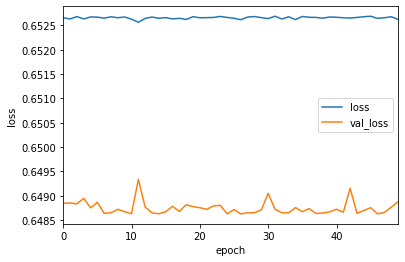

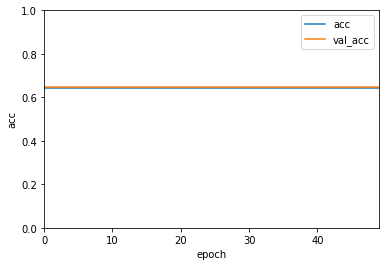

In [249]:
# 各epochにおける損失と精度をdfに入れる
df = pd.DataFrame(fit.history)

# グラフ化
df[["loss", "val_loss"]].plot()
plt.ylabel("loss")
plt.xlabel("epoch")
plt.show()

df[["acc", "val_acc"]].plot()
plt.ylabel("acc")
plt.xlabel("epoch")
plt.ylim([0,1.0])
plt.show()

In [ ]:
#過学習を起こしている。

# ロジスティック回帰

In [217]:
#ロジスティック回帰  
clf = SGDClassifier(loss='log', penalty='none', max_iter=100, fit_intercept=True, random_state=1234)

#clf.fit(X_test, y_test) 使わない
clf.fit(selected_X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=100,
              n_iter_no_change=5, n_jobs=None, penalty='none', power_t=0.5,
              random_state=1234, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [229]:
# ラベルを予測
y_est = clf.predict(selected_X_test)


print(len(y_test))
print(len(y_est))
# 対数尤度
print('対数尤度 = {:.3f}'.format(- log_loss(y_test, y_est)))

# # 正答率
print('正答率 = {:.3f}%'.format(100 * accuracy_score(y_test, y_est)))

7499
7499
対数尤度 = -11.432
正答率 = 66.902%


In [ ]:
#ステップワイズ法によって新たに作った、説明変数の集合をselected_X_train
#としてX_trainの変わりに使用したが、精度が下がった。
#対数前処理が、-11.122→　-11.125
#accuracyが、67.799%→　67.789%

In [231]:
#混同行列を作成
tn, fp, fn, tp = confusion_matrix(y_test, y_est).ravel()
print(fn, fp)
print(tn, tp)

#'Accuracy、Recall、Precisionを求めて表示
print('Accuracy  = {:.3f}%'.format(100 * (tn+tp)/(tn+fp+fn+tp)))
print('Recall    = {:.3f}%'.format(100 * (tp)/(fn+tp)))
print('Precision = {:.3f}%'.format(100 * (tp)/(fp+tp))) 

1938 544
4316 701
Accuracy  = 66.902%
Recall    = 26.563%
Precision = 56.305%


# SVM 

In [239]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
#from common_func import plot_decision_regions
import seaborn as sns

In [243]:
# SVMの実行 ステップワイズ法
C = 1
kernel = "rbf"#ガウスカーネル
gamma = 1
clf = SVC(C=C, kernel=kernel, gamma=gamma)
clf.fit(selected_X_train, y_train)

print("訓練誤差score=",clf.score(selected_X_train, y_train))#スコア（平均accuracy）
print("汎化誤差score=",clf.score(selected_X_test, y_test))

訓練誤差score= 0.6691671667666866
汎化誤差score= 0.6684891318842512


In [244]:
# SVMの実行
C = 1
kernel = "rbf"#ガウスカーネル
gamma = 1
clf = SVC(C=C, kernel=kernel, gamma=gamma)
clf.fit(X_train, y_train)

print("訓練誤差score=",clf.score(X_train, y_train))#スコア（平均accuracy）
print("汎化誤差score=",clf.score(X_test, y_test))

訓練誤差score= 0.8112289124491565
汎化誤差score= 0.6544872649686625
